In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
# Loading the dataset
boston_data = pd.read_csv('boston_house_prices.csv', header=1)
 
# Create an instance of MinMaxScaler
min_max_scaler = MinMaxScaler()
 
# Check for missing values
missing_values_check = boston_data.isnull().sum()

# Normalizing the dataset using Min-Max Scaling
boston_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(boston_data), columns=boston_data.columns)

# Splitting the dataset into training and testing sets
X = boston_data_normalized.drop('MEDV', axis=1)  # Features
y = boston_data_normalized['MEDV']  # Target

# Split the data - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the result of the missing value check and the shapes of the split data
missing_values_check, X_train.shape, X_test.shape, y_train.shape, y_test.shape

(CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
 dtype: int64,
 (404, 13),
 (102, 13),
 (404,),
 (102,))

In [10]:
# Implementing Neural Network using Scikit-Learn
nn_sklearn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_sklearn.fit(X_train, y_train)
nn_predictions = nn_sklearn.predict(X_test)

# Train the model and retrieve the training loss curve
history_sklearn = nn_sklearn.fit(X_train, y_train)

# Evaluating the Neural Network Model
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("Mean Squared Error:", nn_mse)
print("R^2 Score:", nn_r2)


Mean Squared Error: 0.009913099665186128
R^2 Score: 0.7262649497010688


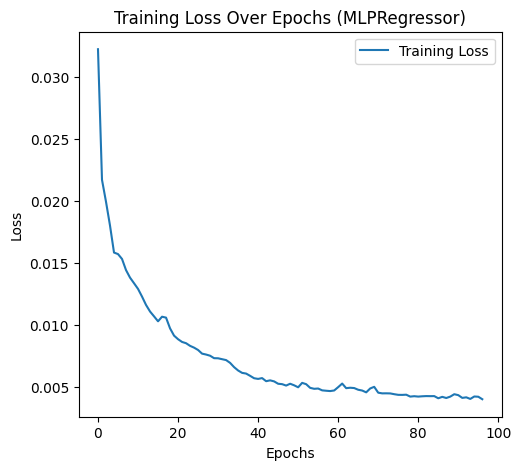

In [11]:
# Placeholder plot for Training Loss Over Epochs
plt.figure(figsize=(12, 5))

# Scatter plot for the Neural Network model
plt.subplot(1, 2, 1)
plt.plot(history_sklearn.loss_curve_, label='Training Loss')
plt.title('Training Loss Over Epochs (MLPRegressor)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

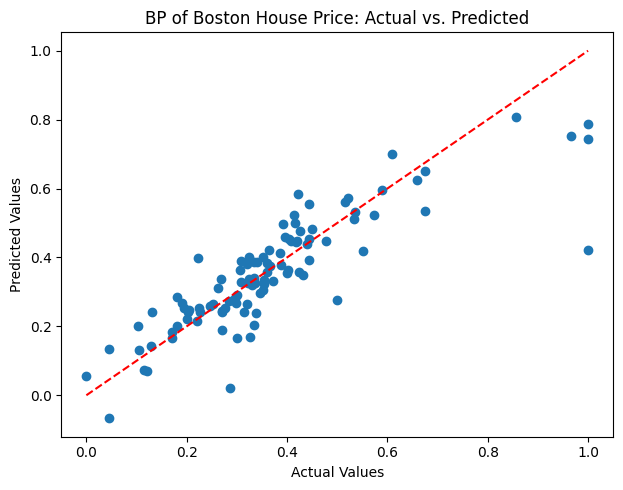

In [12]:
plt.figure(figsize=(12, 5))

# Scatter plot for the Neural Network model
plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_predictions)
plt.title('BP of Boston House Price: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference

plt.tight_layout()
plt.show()
